In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.model_selection import GridSearchCV

In [2]:
# Load the preprocessed dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/preprocessed_crimes_data.csv')

In [3]:
data.isnull()

,Date,Year,Longitude,Latitude,Location Description,Primary Type,Description
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
7916510,False,False,False,False,False,False,False
7916511,False,False,False,False,False,False,False
7916512,False,False,False,False,False,False,False
7916513,False,False,False,False,False,False,False


In [4]:
# Separate features and target variable
X = data.drop('Primary Type', axis=1)
y = data['Primary Type']

In [5]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

# Verify the unique classes in the new sets
unique_classes_train = set(y_train)
unique_classes_val = set(y_val)

print(f'Unique classes in train set: {unique_classes_train}')
print(f'Unique classes in validation set: {unique_classes_val}')

Unique classes in train set: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35}
Unique classes in validation set: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35}


In [6]:
# Initialize XGBoost classifier
model = XGBClassifier(
    objective='multi:softmax',
    eval_metric='mlogloss',
    n_estimators=75,
    max_depth=6,
    learning_rate=0.1,
    n_jobs=-1
)

In [7]:
#Train the model
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)], verbose=True)

[0]	validation_0-mlogloss:2.17887	validation_1-mlogloss:2.17893
[1]	validation_0-mlogloss:1.84210	validation_1-mlogloss:1.84257
[2]	validation_0-mlogloss:1.61944	validation_1-mlogloss:1.61991
[3]	validation_0-mlogloss:1.44736	validation_1-mlogloss:1.44787
[4]	validation_0-mlogloss:1.30910	validation_1-mlogloss:1.30963
[5]	validation_0-mlogloss:1.19267	validation_1-mlogloss:1.19321
[6]	validation_0-mlogloss:1.09379	validation_1-mlogloss:1.09435
[7]	validation_0-mlogloss:1.00738	validation_1-mlogloss:1.00797
[8]	validation_0-mlogloss:0.93221	validation_1-mlogloss:0.93282
[9]	validation_0-mlogloss:0.86644	validation_1-mlogloss:0.86706
[10]	validation_0-mlogloss:0.80787	validation_1-mlogloss:0.80850
[11]	validation_0-mlogloss:0.75607	validation_1-mlogloss:0.75671
[12]	validation_0-mlogloss:0.70948	validation_1-mlogloss:0.71012
[13]	validation_0-mlogloss:0.66763	validation_1-mlogloss:0.66829
[14]	validation_0-mlogloss:0.62999	validation_1-mlogloss:0.63066
[15]	validation_0-mlogloss:0.59619	

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=75,
              n_jobs=-1, num_parallel_tree=None, objective='multi:softmax', ...)

In [8]:
# Evaluate the model on the validation set
y_val_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

Validation Accuracy: 90.90%


In [9]:
# Evaluate the model on the test set
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Test Accuracy: 90.90%


ROC FOR MLOG LOSS

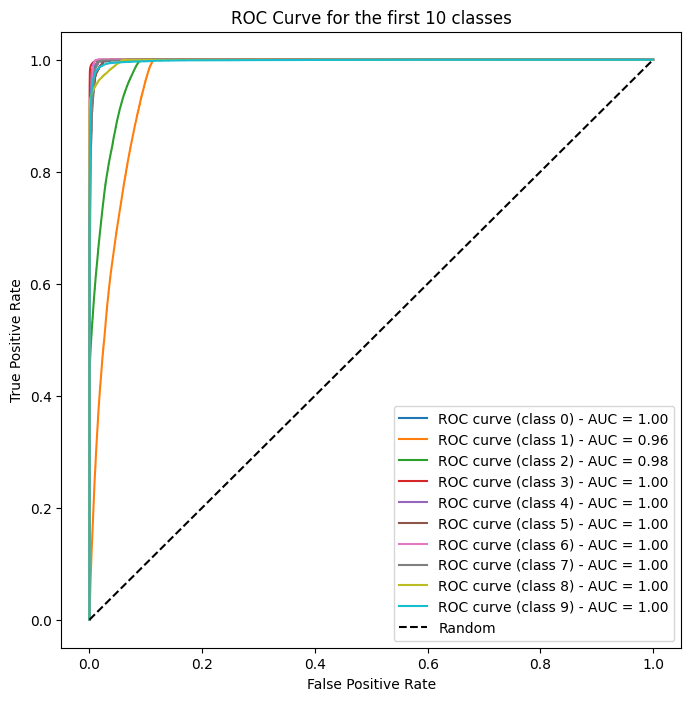

In [10]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test)

# Choose the number of classes to display ROC curves for
n_classes = 10

plt.figure(figsize=(8, 8))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (class {i}) - AUC = {roc_auc:.2f}')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for the first {n_classes} classes')
plt.legend(loc='best')
plt.show()




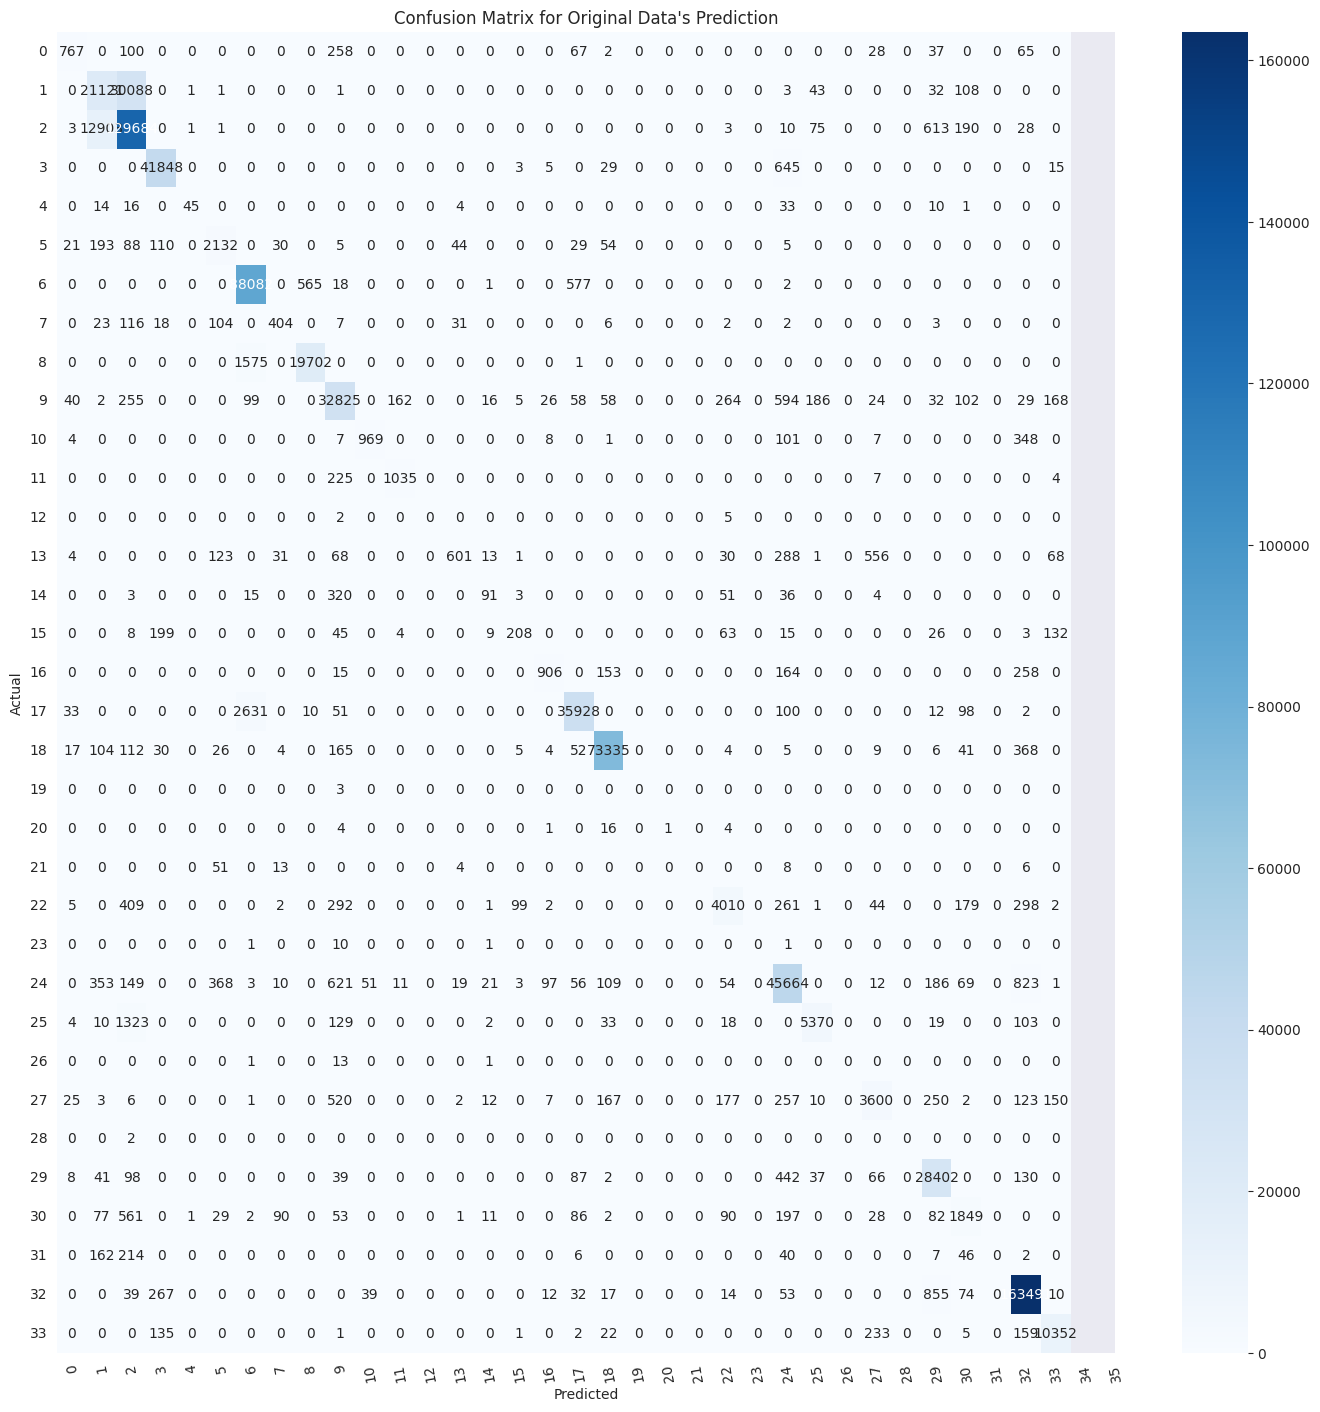

In [11]:
#test confusion matrix

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Set background style for the plot
sns.set_style("dark")  # Change the style here

# Plot confusion matrix as a heatmap
plt.figure(figsize=(14, 14))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=unique_classes_train)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=100)  # Rotate x labels for better readability
plt.yticks(rotation=0)   # Keep y labels horizontal for better readability
plt.tight_layout()
plt.title('Confusion Matrix for Original Data\'s Prediction')
plt.show()

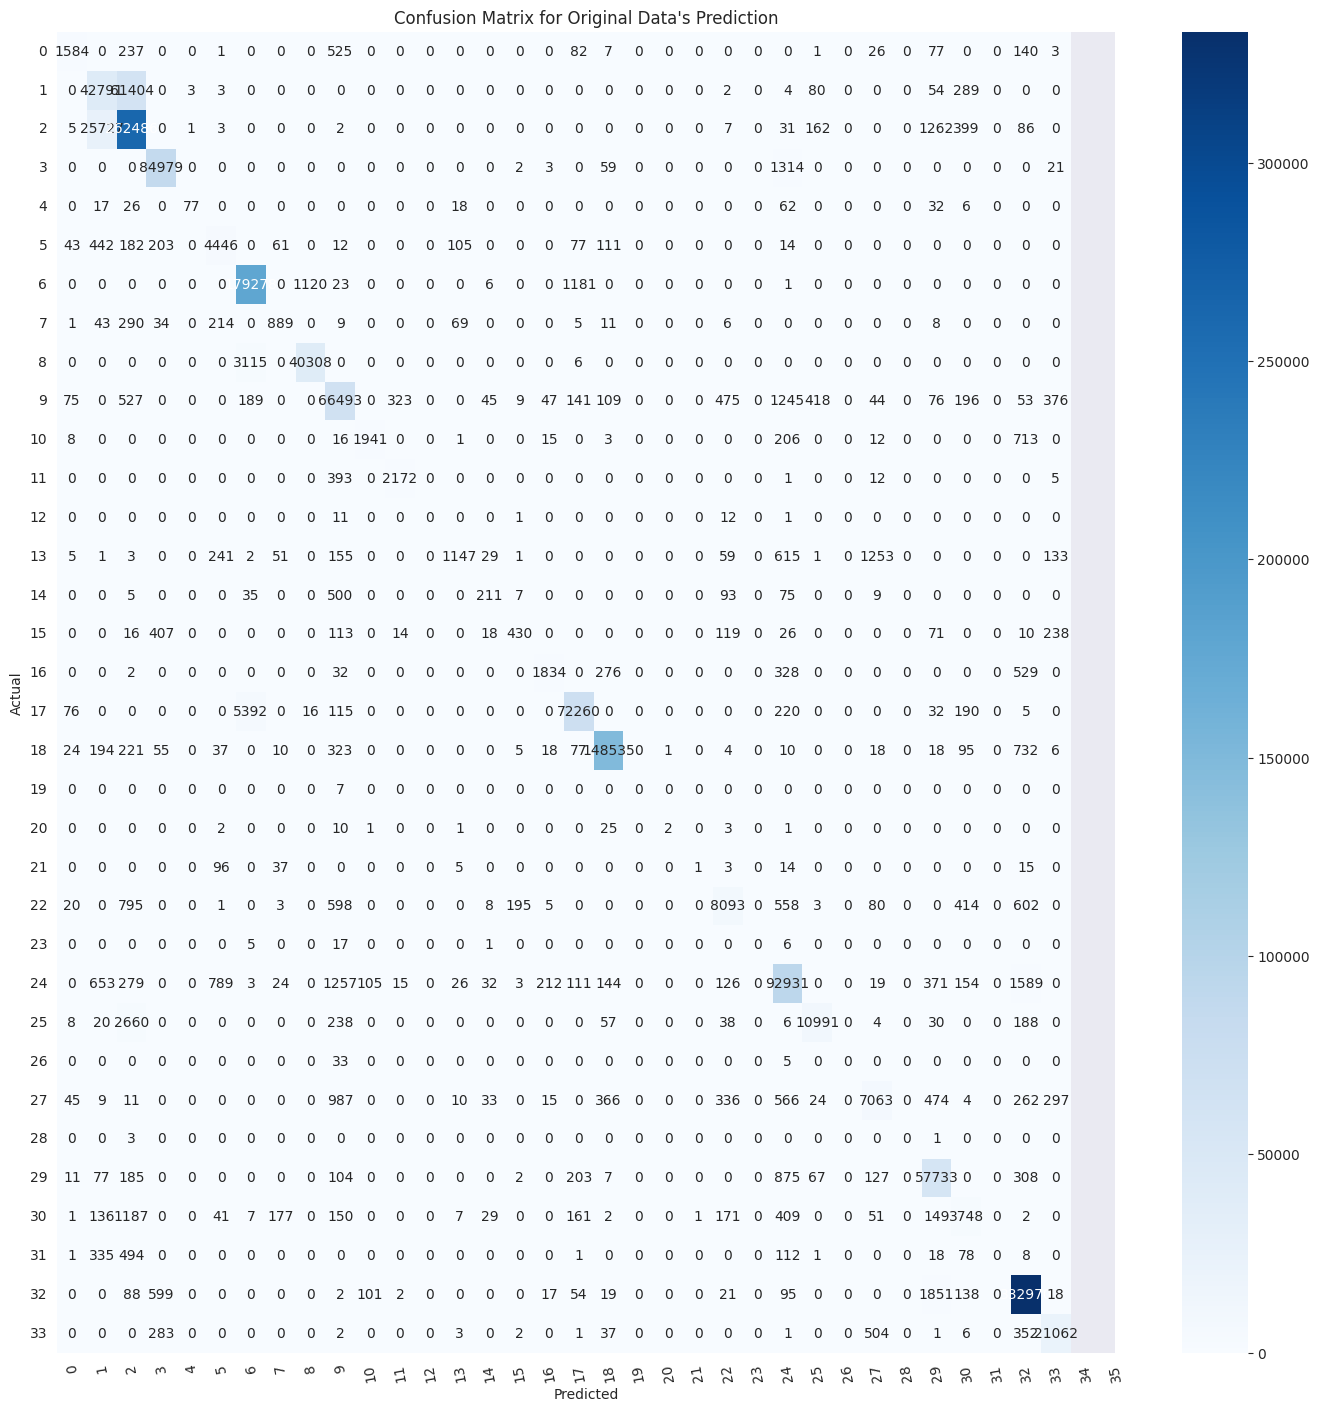

In [12]:
#validation confusion matrix


import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Set background style for the plot
sns.set_style("dark")  # Change the style here

# Plot confusion matrix as a heatmap
plt.figure(figsize=(14, 14))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=unique_classes_train)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=100)  # Rotate x labels for better readability
plt.yticks(rotation=0)   # Keep y labels horizontal for better readability
plt.tight_layout()
plt.title('Confusion Matrix for Original Data\'s Prediction')
plt.show()

In [13]:
#validation data classification report

from sklearn.metrics import classification_report

# Replace X_val or X_test with the respective validation or test set
y_pred = model.predict(X_val)  # Or X_test for test set

# Generate classification report
class_report = classification_report(y_val, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.59      0.69      2683
           1       0.61      0.41      0.49    104630
           2       0.79      0.90      0.84    290171
           3       0.98      0.98      0.98     86378
           4       0.95      0.32      0.48       238
           5       0.76      0.78      0.77      5696
           6       0.95      0.99      0.97    181609
           7       0.71      0.56      0.63      1579
           8       0.97      0.93      0.95     43429
           9       0.92      0.94      0.93     70841
          11       0.90      0.67      0.77      2915
          12       0.86      0.84      0.85      2583
          13       0.00      0.00      0.00        25
          14       0.82      0.31      0.45      3696
          15       0.51      0.23      0.31       935
          16       0.65      0.29      0.41      1462
          17       0.85      0.61      0.71      3001
    

In [14]:
#test data classification report

from sklearn.metrics import classification_report

# Replace X_val or X_test with the respective validation or test set
y_pred = model.predict(X_test)  # Or X_test for test set

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.58      0.68      1324
           1       0.60      0.41      0.49     51398
           2       0.79      0.90      0.85    143511
           3       0.98      0.98      0.98     42545
           4       0.94      0.37      0.53       123
           5       0.75      0.79      0.77      2711
           6       0.95      0.99      0.97     89245
           7       0.69      0.56      0.62       716
           8       0.97      0.93      0.95     21278
           9       0.92      0.94      0.93     34945
          11       0.92      0.67      0.77      1445
          12       0.85      0.81      0.83      1271
          13       0.00      0.00      0.00         7
          14       0.85      0.34      0.48      1784
          15       0.51      0.17      0.26       523
          16       0.63      0.29      0.40       712
          17       0.85      0.61      0.71      1496
    

Hypertuning the model


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 125],  # Fixed value for number of estimators
    'learning_rate': [0.01] ,  # Fixed value for learning rate
}

# Initialize XGBoost classifier
model = XGBClassifier(objective='multi:softmax', eval_metric='mlogloss', n_jobs=-1)

# Initialize StratifiedKFold
stratified_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Initialize GridSearchCV with StratifiedKFold
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='accuracy', cv=stratified_cv)


In [16]:
# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Display the best parameters and corresponding accuracy
print(f'Best Parameters: {grid_search.best_params_}')

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Make predictions on the validation set with the best model
y_val_pred = best_model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy with Best Model: {accuracy * 100:.2f}%')

# Make predictions on the test set with the best model
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy with Best Model: {test_accuracy * 100:.2f}%')

# Display the classification report for the test set
report = classification_report(y_test, y_test_pred)
print(f'{report}')

Best Parameters: {'learning_rate': 0.01, 'n_estimators': 100}
Validation Accuracy with Best Model: 90.15%
Test Accuracy with Best Model: 90.18%
              precision    recall  f1-score   support

           0       0.84      0.47      0.60      1324
           1       0.61      0.32      0.42     51398
           2       0.77      0.93      0.84    143511
           3       0.98      0.98      0.98     42545
           4       0.94      0.37      0.53       123
           5       0.74      0.77      0.75      2711
           6       0.95      0.99      0.97     89245
           7       0.73      0.53      0.61       716
           8       0.97      0.93      0.95     21278
           9       0.89      0.94      0.91     34945
          11       0.89      0.62      0.73      1445
          12       0.90      0.48      0.63      1271
          13       0.00      0.00      0.00         7
          14       0.88      0.32      0.47      1784
          15       0.62      0.09      0.16  

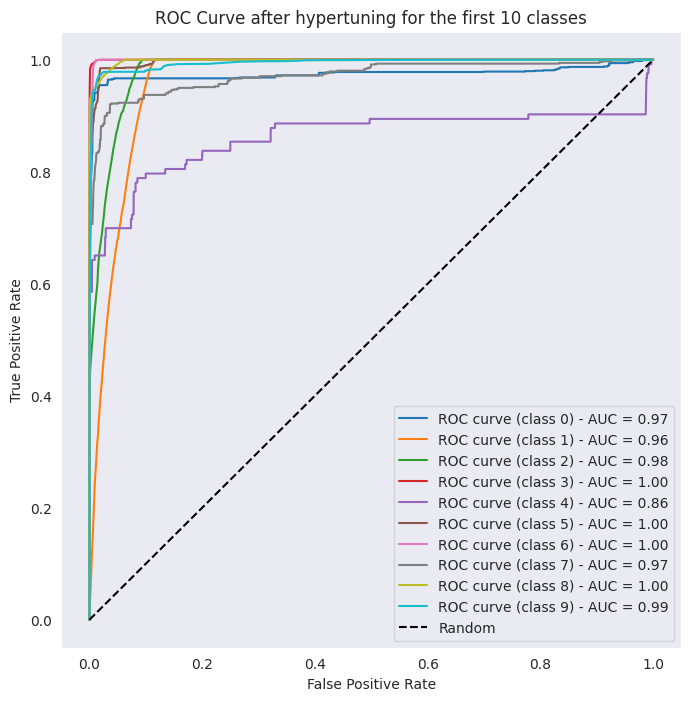

In [18]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = best_model.predict_proba(X_test)

# Choose the number of classes to display ROC curves for
n_classes = 10

plt.figure(figsize=(8, 8))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (class {i}) - AUC = {roc_auc:.2f}')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve after hypertuning for the first {n_classes} classes')
plt.legend(loc='best')
plt.show()






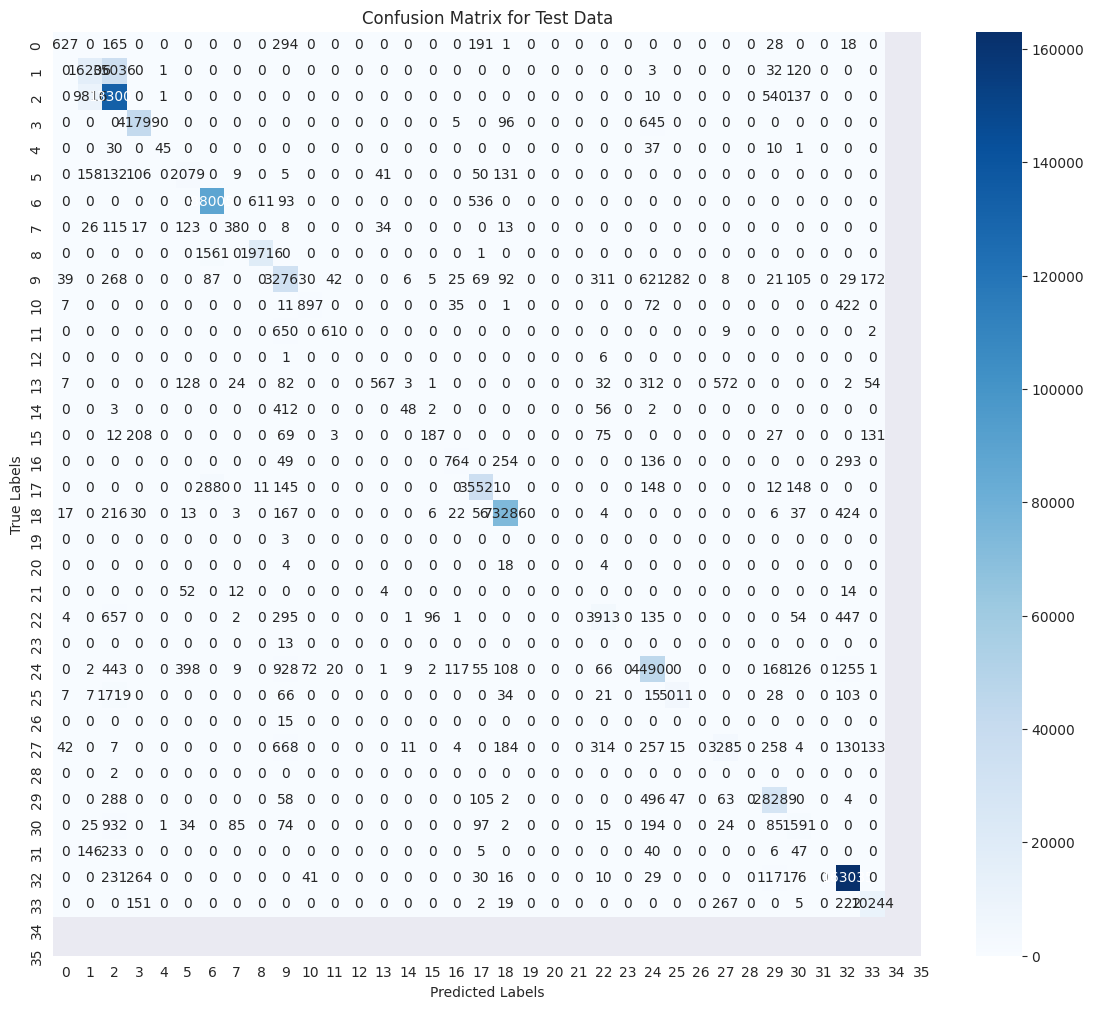

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming best_model is your XGBoost model obtained after GridSearchCV and X_test, y_test are your test data
#y_test_pred = best_model.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Data')
plt.show()
